In [1]:
import numpy as np
import pandas as pd


In [2]:
X_Etruscan = np.array([141, 148, 132, 138, 154, 142, 150, 146, 155, 158,
                       150, 140, 147, 148, 144, 150, 149, 145, 149, 158,
                       143, 141, 144, 144, 126, 140, 144, 142, 141, 140,
                       145, 135, 147, 146, 141, 136, 140, 146, 142, 137,
                       148, 154, 137, 139, 143, 140, 131, 143, 141, 149,
                       148, 135, 148, 152, 143, 144, 141, 143, 147, 146,
                       150, 132, 142, 142, 143, 153, 149, 146, 149, 138,
                       142, 149, 142, 137, 134, 144, 146, 147, 140, 142,
                       140, 137, 152, 145])
# 统计数据的最小值与最大值
X_min, X_max = min(X_Etruscan), max(X_Etruscan)
X_min, X_max


(126, 158)

In [3]:
# 生成从 124.5 到 159.5(包含)距离相等的 8 个数，作为区间端点
bins = np.linspace(X_min - 1.5, X_max + 1.5, 8)
bins


array([124.5, 129.5, 134.5, 139.5, 144.5, 149.5, 154.5, 159.5])

In [4]:
# 以 bins 为区间端点,统计落在每个区间的数据频数
uniform_divide = pd.cut(X_Etruscan, bins, include_lowest=True).value_counts()
uniform_divide


(124.499, 129.5]     1
(129.5, 134.5]       4
(134.5, 139.5]      10
(139.5, 144.5]      33
(144.5, 149.5]      24
(149.5, 154.5]       9
(154.5, 159.5]       3
dtype: int64

In [5]:
# 计算频率
freq = uniform_divide.values        # 每组频数
frequency = freq / sum(freq)        # 频数/总个数
frequency = np.round(frequency, 5)  # 保留 5 位小数
frequency


array([0.0119 , 0.04762, 0.11905, 0.39286, 0.28571, 0.10714, 0.03571])

In [6]:
# 计算 累积频率
cumfreq = np.cumsum(frequency)  # cumsum 求累积和
cumfreq = np.round(cumfreq, 4)  # 保留 4 位小数
cumfreq


array([0.0119, 0.0595, 0.1786, 0.5714, 0.8571, 0.9643, 1.    ])

In [7]:
# 绘制频数分布表
df = pd.DataFrame()
df['Freq'] = freq                           # 频数
df['Frequency'] = np.round(frequency, 4)    # 频率
df['CumFreq'] = cumfreq                     # 累积频率
df.index = uniform_divide.index             # 以组限作为索引
df


,Freq,Frequency,CumFreq
"(124.499, 129.5]",1,0.0119,0.0119
"(129.5, 134.5]",4,0.0476,0.0595
"(134.5, 139.5]",10,0.1190,0.1786
"(139.5, 144.5]",33,0.3929,0.5714
"(144.5, 149.5]",24,0.2857,0.8571
"(149.5, 154.5]",9,0.1071,0.9643
"(154.5, 159.5]",3,0.0357,1.0000


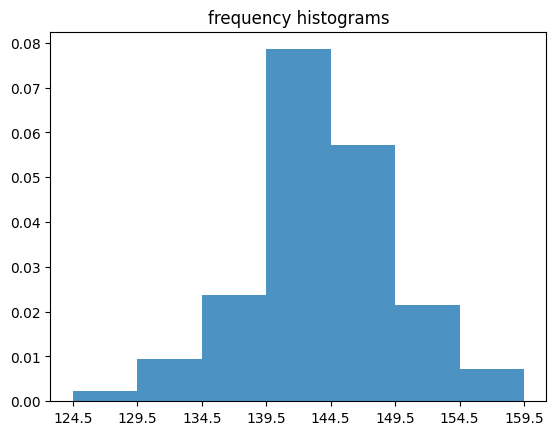

In [8]:
# 绘制频率直方图
import matplotlib.pyplot as plt
# hist 绘制直方图, bins 为区间端点, density=True 矩形面积表示频率, alpha 设置透明度
plt.hist(X_Etruscan, bins=bins, density=True, alpha=0.8)
plt.title('frequency histograms')
plt.xticks(bins) # 以区间端点作为 x 轴刻度
plt.show()


seaborn 是基于 matplotlib 的数据可视化库。它提供了一个高度交互式界面，用于绘制有吸引力和信息丰富的统计图形。

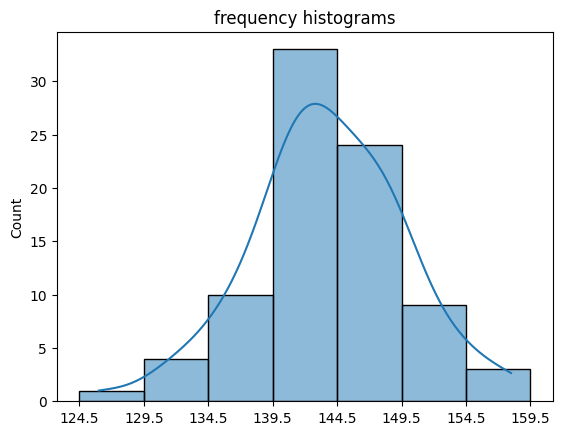

In [9]:
import seaborn as sns
# distplot 绘制直方图以及核密度估计曲线
sns.histplot(X_Etruscan, bins=bins, kde=True)
plt.title('frequency histograms')
plt.xticks(bins)
plt.show()


C:\Users\Linhieng\AppData\Local\Temp\ipykernel_13688\1777119867.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_Etruscan, bins=bins, kde=False, fit=norm)


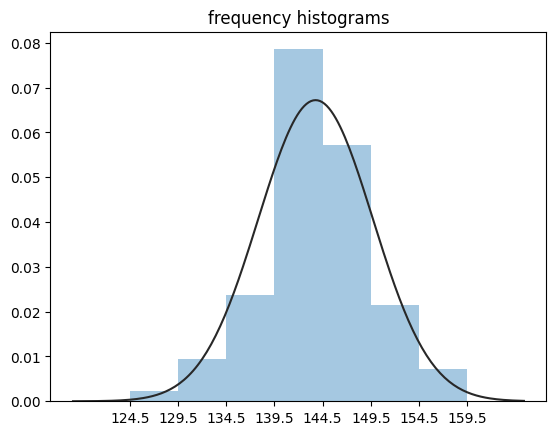

In [10]:
from scipy.stats import norm
# kde=False 关闭核密度估计, fit=norm 拟合正态分布相应的概率密度曲线
sns.distplot(X_Etruscan, bins=bins, kde=False, fit=norm)
plt.title('frequency histograms')
plt.xticks(bins)
plt.show()


## 例1
设一组容量为18的样本值如下（已经过排序）：

122, 126, 133, 140, 145, 145, 149, 150, 157,
162, 166, 175, 177, 177, 183, 188, 199, 212

求样本分位数： $x_{0.2}$, $x_{0.25}$, $x_{0.5}$。

解求百分位数可使用 numpy 中的 `percentile()`, 也可使用 pandas 中的 `quantile()`。

In [11]:
# 使用 percentile() 求分位数
X = np.array([122, 126, 133, 140, 145, 145, 149, 150, 157,
              162, 166, 175, 177, 177, 183, 188, 199, 212])
np.percentile(X, q=[20, 25, 50])


array([142. , 145. , 159.5])

In [12]:
# 将数据转为 DataFrame 形式，用 quantile() 求分位数
dfX = pd.DataFrame()
dfX['X'] = np.array([122, 126, 133, 140, 145, 145, 149, 150, 157,
                     162, 166, 175, 177, 177, 183, 188, 199, 212])
dfX.quantile(q=[0.2, 0.25, 0.5])  # 分位数的表示形式与 percentile() 不同


,X
0.20,142.0
0.25,145.0
0.50,159.5
